# Introduction
This note book creates and saves a dataframe for the MLB hitting stats for the past 5 years.

# Notebook Setup

## Imports

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

## Work around 403 error

In [2]:
# a small little ruse
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36'
}

## Scraping Website

[MLB.com](https://www.mlb.com/stats/)

The base url for regular season is below. Notice the only parts of the url that change are the year and page number.



In [3]:
# f'https://www.mlb.com/stats/{year}?page={page}&playerPool=ALL'

# Create function to scrap and build stats table

## Finding 'stats-body-table player' table from [MLB website](https://www.mlb.com/stats)

Click or scroll through divs until the entire table is highlighted. Fortunately, the table has an easily identifiable class label. Even more fortunately, the table includes data and columns names. 

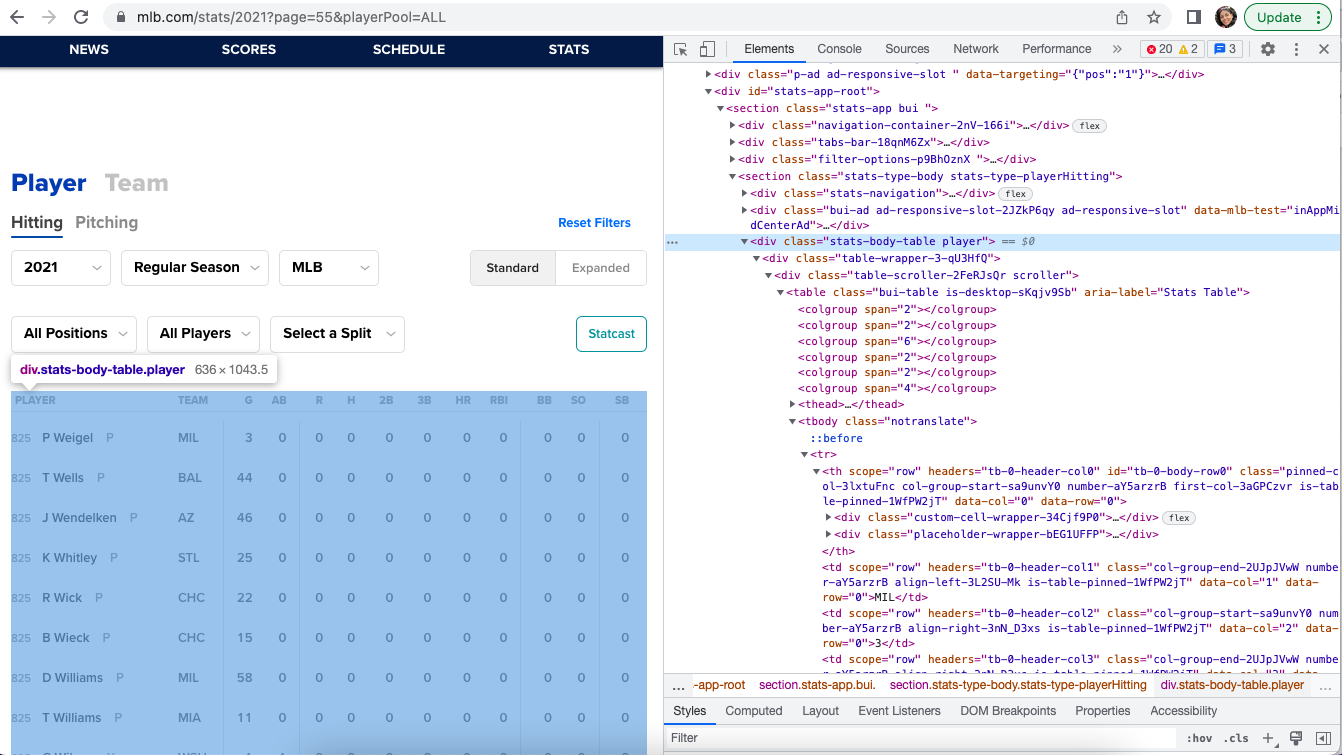

## `create_MLB_table` function

In [7]:
def create_MLB_table(year, page):
    
    if year == '2022':
        # current season defualts to postseason
        base_url = f'https://www.mlb.com/stats/regular-season?page={page}&playerPool=ALL'
    else:
        # base URL with year and page variables
        base_url = f'https://www.mlb.com/stats/{year}?page={page}&playerPool=ALL'
        
    
    
    # request for beautiful soup
    response = requests.get(base_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # find the table from website (see above screen shot)
    table = soup.find('div', class_ = 'stats-body-table player')
    
    # convert to pandas df
    df = pd.read_html(str(table))[0]
    
    return df

## Test Function with a year and a page number.
Running this one time to not only see if it works but also to show what the table looks like. The column names are duplicated and will need to be renamed. 

In [8]:
# this is just a test
create_MLB_table('2022', 1).head()

,PLAYERPLAYER,TEAMTEAM,GG,ABAB,RR,HH,2B2B,3B3B,HRHR,RBIRBI,BBBB,SOSO,SBSB,CSCS,AVGAVG,OBPOBP,SLGSLG,caret-upcaret-downOPScaret-upcaret-downOPS
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139


# Create Dataframe of 5 years of stats

I want scrap 5 years of data. Remember the 2020 season was cancelled due to Covid. This means starting in 2022, I will need to scrap back to 2017.

## Scrape each year and save to df

In [9]:
years_to_scrap = ['2022', '2021', '2019', '2018', '2017']

yearly_dfs = []

for year in years_to_scrap:
      
    #######################################
    # Initialize Table                    #
    #######################################
    
    # page number for initializing the table
    page = 1

    # initialize table
    stats_table = create_MLB_table(year, page)
    
    
    #######################################
    # Scrap additional pages              #
    #######################################
    
    # set a limit of number of pages to scrap so this does not run forever
    num_of_pages_to_scrap = 100
    
    # Start on page 2, first page used to initialize table
    for page in range(2,num_of_pages_to_scrap):

        # save new df to concat with initialized table
        pandas_table = create_MLB_table(year, page)
        
        # check if there is data in the table
        if len(pandas_table) > 0:
            
            # if there is info in table then concat it to initialized table
            stats_table = pd.concat(
                [stats_table, pandas_table], # two tables to combine
                ignore_index=True # ignore original index, keep one continuous count
            )
            
        # if no data in the table then we have reached the end, break out of loop
        else:
            print(f'{year} table finished, {page-1} pages scraped.')
            break
            
    #######################################
    # Add `year` column to df             #
    #######################################

    stats_table['year'] = year
    
    #######################################
    # Save df                             #
    #######################################
    
    yearly_dfs.append(stats_table)
    

2022 table finished, 32 pages scraped.
2021 table finished, 55 pages scraped.
2019 table finished, 52 pages scraped.
2018 table finished, 51 pages scraped.
2017 table finished, 50 pages scraped.


## Check first df 

In [10]:
yearly_dfs[0].head()

,PLAYERPLAYER,TEAMTEAM,GG,ABAB,RR,HH,2B2B,3B3B,HRHR,RBIRBI,BBBB,SOSO,SBSB,CSCS,AVGAVG,OBPOBP,SLGSLG,caret-upcaret-downOPScaret-upcaret-downOPS,year
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500,2022
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000,2022
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409,2022
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367,2022
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139,2022


## Concatenate all years' dfs into one df

In [11]:
MLB_5_years = pd.concat(yearly_dfs, ignore_index=True)
MLB_5_years.head()

,PLAYERPLAYER,TEAMTEAM,GG,ABAB,RR,HH,2B2B,3B3B,HRHR,RBIRBI,BBBB,SOSO,SBSB,CSCS,AVGAVG,OBPOBP,SLGSLG,caret-upcaret-downOPScaret-upcaret-downOPS,year
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500,2022
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000,2022
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409,2022
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367,2022
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139,2022


# Cleaning

- Fix columns names
 - Current columns names are repeated twice and not very reader friendly.
 - 'caret-upcaret-down' is an artifact of the websites interactive df, this needs to be removed.
 
- Extract out player name and position from `PLAYERPLAYER` column

## Fix column names

### Find button tags to extract data need to update column names


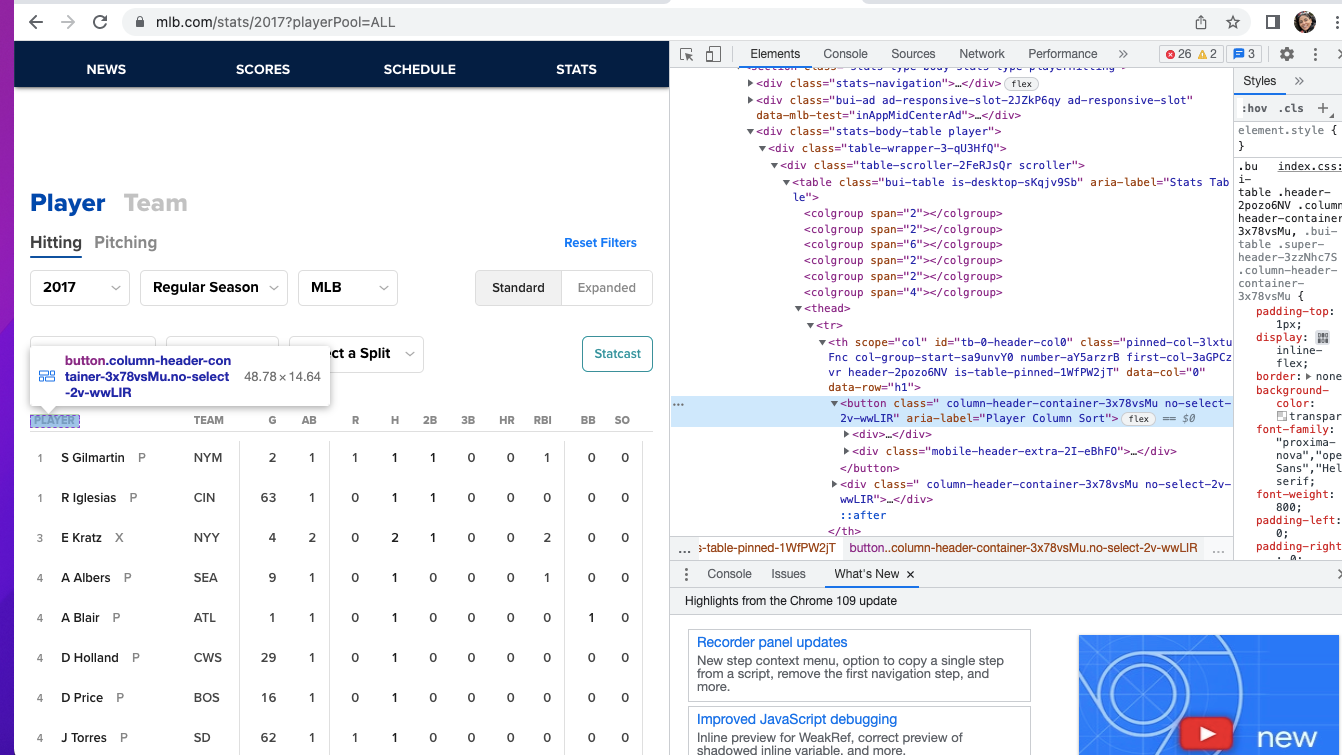

### Show all button tags

In [12]:
# make request
response = requests.get('https://www.mlb.com/stats/', headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

# find the div table from website
# still within the stats table used before
table = soup.find('div', class_ = 'stats-body-table player')

buttons = table.find_all('button')

buttons

[<button aria-label="Player Column Sort" class="column-header-container-3x78vsMu no-select-2v-wwLIR"><div><abbr class="bui-text cellheader bui-text">PLAYER</abbr></div><div class="mobile-header-extra-2I-eBhFO"><div></div><div></div></div></button>,
 <button aria-label="Team Column Sort" class="column-header-container-3x78vsMu no-select-2v-wwLIR"><div><abbr class="bui-text cellheader bui-text">TEAM</abbr></div><div class="mobile-header-extra-2I-eBhFO"><div></div><div></div></div></button>,
 <button aria-label="Games Played Column Sort" class="column-header-container-3x78vsMu no-select-2v-wwLIR"><div><abbr class="bui-text cellheader bui-text">G</abbr></div><div class="mobile-header-extra-2I-eBhFO"><div></div><div></div></div></button>,
 <button aria-label="At Bats Column Sort" class="column-header-container-3x78vsMu no-select-2v-wwLIR"><div><abbr class="bui-text cellheader bui-text">AB</abbr></div><div class="mobile-header-extra-2I-eBhFO"><div></div><div></div></div></button>,
 <button a

### Extract data from button tags to create `legend_dict`

In [13]:
# epmpty dictionary to store key value pairs
legend_dict = {}

# loop through all the buttons in `table`
for button in buttons:
    # get the text of the button
    key = button.get_text().replace('caret-upcaret-down', '')
    # get the description, cut off 'Column Sort'
    value = button['aria-label'].replace(' Column Sort', '') 
    
    legend_dict[key] = value # create and store key value pair

# view dictionary
legend_dict

{'PLAYER': 'Player',
 'TEAM': 'Team',
 'G': 'Games Played',
 'AB': 'At Bats',
 'R': 'Runs',
 'H': 'Hits',
 '2B': 'Doubles',
 '3B': 'Triples',
 'HR': 'Home Runs',
 'RBI': 'Runs Batted In',
 'BB': 'Walks',
 'SO': 'Strikeouts',
 'SB': 'Stolen Bases',
 'CS': 'Caught Stealing',
 'AVG': 'Batting Average',
 'OBP': 'On-Base Percentage',
 'SLG': 'Slugging Percentage',
 'OPS': 'On-Base Plus Slugging',
 '1': 'page 1 button',
 '2': 'page 2 button',
 '3': 'page 3 button',
 '4': 'page 4 button',
 'Next': 'next page button'}

### Remove duplicated part of column name to match `legend_dict` keys()

In [14]:
# change column names from NAMENAME to NAME
fix_col_names = []
for col in MLB_5_years.columns:
    if col == 'year':
        name = col.capitalize() 
    else:
        if 'caret-upcaret-down' in col:
            name = col.split('caret-upcaret-down')[-1]
        else:
            name = col[:int(len(col)/2)]
    fix_col_names.append(name)

MLB_5_years.columns = fix_col_names

MLB_5_years.head()

,PLAYER,TEAM,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS,Year
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500,2022
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000,2022
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409,2022
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367,2022
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139,2022


### Rename columns to more reader-friendly names

In [15]:
MLB_5_years.rename(columns = legend_dict, inplace = True)
MLB_5_years.head()

,Player,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Year
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500,2022
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000,2022
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409,2022
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367,2022
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139,2022


## Remove diacritical marks from a `Player` column
Code for this came from [stackoverflow](https://stackoverflow.com/questions/517923/what-is-the-best-way-to-remove-accents-normalize-in-a-python-unicode-string)

To normalize the text I will strip it of all diacritical marks (accents & squiggly lines over letters)

In [16]:
####### stackoverflow code #######

import unicodedata
import regex

def remove_accent_chars_regex(x: str):
    return regex.sub(r'\p{Mn}', '', unicodedata.normalize('NFKD', x))

####### stackoverflow code #######

Replace the column with cleaned strings

In [17]:
cleaned_names = []

for name in MLB_5_years['Player']:
    cleaned = remove_accent_chars_regex(name)
    cleaned_names.append(cleaned)

# replace with cleaned values
MLB_5_years['Player'] = cleaned_names

# Save 

In [116]:
pd.to_pickle(MLB_5_years, "../pickled_tables/MLB_5_years_df.pkl")

# load
#MLB_5_years = pd.read_pickle("../pickled_tables/MLB_5_years_df.pkl")

# Check the names that will split unusually

In [125]:
def print_last_name_exceptions(table=MLB_5_years, column_extracting_info_from='Player'):

    for row in table[column_extracting_info_from]:

        # raw string with suffix removed
        player_gibberish = row.replace(" Jr.", "")
        player_gibberish = player_gibberish.replace(" II", "")
        player_gibberish = player_gibberish.replace(" Sr.", "")
        
        # string split at first space only
        player_gibberish = player_gibberish.split(' ',1)

        # extract out row number
        row_num = ''.join(filter(str.isdigit, player_gibberish[0]))
        
        if len(row_num) > 0:
            # remove row number from end of last element
            lastname_lastname_position = player_gibberish[-1].split(row_num)[0]

        else:
            lastname_lastname_position = player_gibberish

        

        # list out all positions
        positions = ['1B', '2B', '3B', 'RF', 'LF', 'CF', 'P', 'C', 'DH', 'SS', 'X']

        # loop through positions
        for position in positions:

            if position in lastname_lastname_position[-2:]:

                # duplicated last name
                last_last = lastname_lastname_position[:-len(position)]

                # remove second half
                half = len(last_last)/2

                # check - print names with exceptions
                last = last_last[int(half):]
                
                if lastname_lastname_position != last+last+position:                    
                    print(f'full string: {row}')
                    print(f'\t     {lastname_lastname_position}')
                    print()

                break

In [126]:
print_last_name_exceptions()

full string: 61Ji HwanJ BaeBaeCF61‌‌‌
	     HwanJ BaeBaeCF

full string: 315Michael A.M TaylorTaylorCF315‌‌‌
	     A.M TaylorTaylorCF

full string: 509Josh H.J SmithSmith3B509‌‌‌
	     H.J SmithSmith3B

full string: 614Jose J BarreroBarreroSS614‌‌‌
	     J BarreroBarreroSS

full string: 436Michael A.M TaylorTaylorCF436‌‌‌
	     A.M TaylorTaylorCF

full string: 522Jose J BarreroBarreroSS522‌‌‌
	     J BarreroBarreroSS

full string: 695Chi ChiC GonzalezGonzalezP695‌‌‌
	     ChiC GonzalezGonzalezP

full string: 735Kwang HyunK KimKimP735‌‌‌
	     HyunK KimKimP

full string: 825YefryRamirez, YRamirezP825‌‌‌
	     YRamirezP

full string: 825Hyun JinH RyuRyuP825‌‌‌
	     JinH RyuRyuP

full string: 425Michael A.M TaylorTaylorCF425‌‌‌
	     A.M TaylorTaylorCF

full string: 448John RyanJ MurphyMurphyC448‌‌‌
	     RyanJ MurphyMurphyC

full string: 509Jung HoJ KangKang3B509‌‌‌
	     HoJ KangKang3B

full string: 634Hyun JinH RyuRyuP634‌‌‌
	     JinH RyuRyuP

full string: 785Chi ChiC GonzalezGonzale

In [ ]:
################################################################################################

In [ ]:
# try to split, make df to store all values, and any corrections needed

# SETUP for df
positions = ['1B', '2B', '3B', 'RF', 'LF', 'CF', 'P', 'C', 'DH', 'SS', 'X']
suffixes = [" Jr.", " II", " Sr."]

In [117]:
# grab just the raw string
raw_strings = [raw_string for raw_string in MLB_5_years['Player']]

# example
for element in raw_strings[:3]:
    print(element)
    print(element.split())
    print()

1KhalilK LeeLeeCF1‌‌‌
['1KhalilK', 'LeeLeeCF1\u200c\u200c\u200c']

2ChadwickC TrompTrompC2‌‌‌
['2ChadwickC', 'TrompTrompC2\u200c\u200c\u200c']

3JamesJ OutmanOutmanLF3‌‌‌
['3JamesJ', 'OutmanOutmanLF3\u200c\u200c\u200c']



need to remove '\u200c\u200c\u200c' from the strings. Without removing cleaning and extracting the players positions are difficult.

In [118]:
visible_raw_strings = []
for element in raw_strings:
    l = element.split()
    # drop invisible '\u200c\u200c\u200c' from last element
    l[-1] = l[-1].replace('\u200c\u200c\u200c','')
    visible_raw_strings.append(" ".join(l))

visible_raw_strings[:3]

['1KhalilK LeeLeeCF1', '2ChadwickC TrompTrompC2', '3JamesJ OutmanOutmanLF3']

In [197]:
# convert into a dataframe
fix_names_df = pd.DataFrame(visible_raw_strings)

In [198]:
# view
fix_names_df

,0
0,1KhalilK LeeLeeCF1
1,2ChadwickC TrompTrompC2
2,3JamesJ OutmanOutmanLF3
3,4OttoO LopezLopezSS4
4,5MattM CarpenterCarpenterDH5
...,...
5949,802GabrielG YnoaYnoaP802
5950,802MichaelM YnoaYnoaP802
5951,802ChrisC YoungYoungP802
5952,802BradB ZieglerZieglerP802


In [199]:
player_suffix = []
web_row = []
player_position = []
player_stripped = []


for player in visible_raw_strings:
    
    #########################################
    # remove and save suffix if present     #
    #########################################
    
    # default to no suffix
    suff = ''
    
    for suffix in suffixes:        
        if suffix in player:
            # overwrite suff value
            suff = suffix
            
    # after looping through suffixes, append the correct suffix to list 
    player_suffix.append(suff)
    
    
    #remove suffix from raw_string (ie player)
    no_suffix_name = player.replace(suff, '')
    
    #########################################        
    # remove row number from no_suffix_name #
    #########################################
    
    # get row number from first element after split
    # need to split or will grab all the numbers, from front and end of string
    row_num = ''.join(filter(str.isdigit, no_suffix_name.split()[0]))
    
    web_row.append(row_num) # append website row number to list
    
    #remove row number from no suffix name
    player_string_without_row_num = no_suffix_name.replace(row_num, '')
    
    #########################################
    # get and save player position          #
    #########################################
    
    # loop through positions
    for position in positions:
        
        # if position in last 3 of player_string_without_row_num
        # can only include last 3 or players with letters that match position will 
        # have incorrect position assignment
        if position in player_string_without_row_num[-3:]:
            
            # append position to list
            player_position.append(position)
            
            # grab everything from string EXCEPT position
            # this step is why '\u200c\u200c\u200c' needed to be removed
            player_no_num_no_position = player_string_without_row_num[:-len(position)]
            
            player_stripped.append(player_no_num_no_position)
            
            break # break out of position searching for loop

In [200]:
# check lengths befoer trying to add to df
print(len(player_suffix))
print(len(web_row))
print(len(player_position))
print(len(player_stripped))
print(target_length)

5954
5954
5954
5954
5954


In [201]:
# add columns to 
fix_names_df['suffix'] = player_suffix
fix_names_df['website_row'] = web_row
fix_names_df['Position'] = player_position
fix_names_df['suff_num_pos_removed'] = player_stripped

fix_names_df

,0,suffix,website_row,Position,suff_num_pos_removed
0,1KhalilK LeeLeeCF1,,1,CF,KhalilK LeeLee
1,2ChadwickC TrompTrompC2,,2,C,ChadwickC TrompTromp
2,3JamesJ OutmanOutmanLF3,,3,LF,JamesJ OutmanOutman
3,4OttoO LopezLopezSS4,,4,SS,OttoO LopezLopez
4,5MattM CarpenterCarpenterDH5,,5,DH,MattM CarpenterCarpenter
...,...,...,...,...,...
5949,802GabrielG YnoaYnoaP802,,802,P,GabrielG YnoaYnoa
5950,802MichaelM YnoaYnoaP802,,802,P,MichaelM YnoaYnoa
5951,802ChrisC YoungYoungP802,,802,P,ChrisC YoungYoung
5952,802BradB ZieglerZieglerP802,,802,P,BradB ZieglerZiegler


The above is just temporary storage as I work to getting players names. 
I need to extract 

In [202]:
#print_last_name_exceptions(table=fix_names_df, column_extracting_info_from='suff_num_pos_removed')

In [203]:
# check for '.' anywhere except first name
for name in player_stripped:
    if '.' in name:
        for i in range(len(name.split())):
            if i > 0:
                if '.' in name.split()[i]: 
                    print(name)

Michael A.M TaylorTaylor
Josh H.J SmithSmith
Michael A.M TaylorTaylor
Michael A.M TaylorTaylor
Josh A.J SmithSmith
Josh D.J SmithSmith
Michael A.M TaylorTaylor
Jose A.J ValdezValdez
Michael A.M TaylorTaylor
Josh A.J SmithSmith
Jose A.J ValdezValdez


In [204]:
# all '.' are second element and last names are 1 word, PERFECT!


In [205]:
# extract middle initials
middle_initials = []

for name in player_stripped:
    middle_initial = ''
    if "." in name.split()[1]:
        middle_initial = name.split()[1][:-1]
    middle_initials.append(middle_initial)

In [206]:
len(middle_initials)

5954

In [207]:
# remove middle initials from player_stripped strings
player_stripped_initial_removed = []

for i in range(len(player_stripped)):
    if len(middle_initials[i]) > 0:
        strip_initial = player_stripped[i].replace(' '+middle_initials[i], '')
        player_stripped_initial_removed.append(strip_initial)
    else:
        player_stripped_initial_removed.append(player_stripped[i])

In [208]:
len(player_stripped_initial_removed)

5954

In [209]:
fix_names_df['middle_initial'] = middle_initials
fix_names_df['initial_removed'] = player_stripped_initial_removed

fix_names_df

,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed
0,1KhalilK LeeLeeCF1,,1,CF,KhalilK LeeLee,,KhalilK LeeLee
1,2ChadwickC TrompTrompC2,,2,C,ChadwickC TrompTromp,,ChadwickC TrompTromp
2,3JamesJ OutmanOutmanLF3,,3,LF,JamesJ OutmanOutman,,JamesJ OutmanOutman
3,4OttoO LopezLopezSS4,,4,SS,OttoO LopezLopez,,OttoO LopezLopez
4,5MattM CarpenterCarpenterDH5,,5,DH,MattM CarpenterCarpenter,,MattM CarpenterCarpenter
...,...,...,...,...,...,...,...
5949,802GabrielG YnoaYnoaP802,,802,P,GabrielG YnoaYnoa,,GabrielG YnoaYnoa
5950,802MichaelM YnoaYnoaP802,,802,P,MichaelM YnoaYnoa,,MichaelM YnoaYnoa
5951,802ChrisC YoungYoungP802,,802,P,ChrisC YoungYoung,,ChrisC YoungYoung
5952,802BradB ZieglerZieglerP802,,802,P,BradB ZieglerZiegler,,BradB ZieglerZiegler


In [210]:
fix_names_df[fix_names_df['suff_num_pos_removed']=='Michael A.M TaylorTaylor']

,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed
314,315Michael A.M TaylorTaylorCF315,,315,CF,Michael A.M TaylorTaylor,A.,MichaelM TaylorTaylor
1232,436Michael A.M TaylorTaylorCF436,,436,CF,Michael A.M TaylorTaylor,A.,MichaelM TaylorTaylor
2594,425Michael A.M TaylorTaylorCF425,,425,CF,Michael A.M TaylorTaylor,A.,MichaelM TaylorTaylor
3890,434Michael A.M TaylorTaylorCF434,,434,CF,Michael A.M TaylorTaylor,A.,MichaelM TaylorTaylor
4891,167Michael A.M TaylorTaylorCF167,,167,CF,Michael A.M TaylorTaylor,A.,MichaelM TaylorTaylor


In [228]:
last_names = []
first_names = []

for name in fix_names_df['initial_removed']:
    
    # checking an saving last names
    split_at_last_space_only = name.split(' ',-1)
    last_element = split_at_last_space_only[-1]
    
    # check if last is a mirror
    mirror_point = int(len(last_element)/2) #defaults to float 

    first_half_of_last_element = last_element[:mirror_point]
    second_half_of_last_element = last_element[mirror_point:]

    if first_half_of_last_element == second_half_of_last_element:
        last_name = first_half_of_last_element
        first_name = split_at_last_space_only[0][:-1]
        
    else:
            
        split_at_first_space_only = name.split(' ',1)
        last_element = split_at_first_space_only[-1]
        
        mirror_point = int(len(last_element)/2)
        first_half_of_last_element = last_element[:mirror_point]
        second_half_of_last_element = last_element[mirror_point:]
        
        if first_half_of_last_element == second_half_of_last_element:
            last_name = first_half_of_last_element
            first_name = split_at_first_space_only[0][:-1]
    
    # manually input special names
    if 'YefryRamirez, YRamirez' == name:
        last_name = 'Ramirez'
        first_name = 'Yefry'
    elif 'WillyW Garcia Garcia' == name:
        last_name = 'Garcia'
        first_name = 'Willy'
    elif 'Ji HwanJ BaeBae' == name:
        last_name = 'Bae'
        first_name = 'Ji Hwan'
    elif 'Jose J BarreroBarrero' == name:
        last_name = 'Barrero'
        first_name = 'Jose J'
    elif 'Chi ChiC GonzalezGonzalez' == name:
        last_name = 'Gonzalez'
        first_name = 'Chi Chi'
    elif 'Hyun JinH RyuRyu' == name:
        last_name = 'Ryu'
        first_name = 'Hyun Jin'
    elif 'John RyanJ MurphyMurphy' == name:
        last_name = 'Murphy'
        first_name = 'John Ryan'
    elif 'Jung HoJ KangKang' == name:
        last_name = 'Kang'
        first_name = 'Jung Ho'
    elif 'Jose MiguelJ FernandezFernandez' == name:
        last_name = 'Fernandez'
        first_name = 'Jose Miguel'
    elif 'Jose ManuelJ FernandezFernandez' == name:
        last_name = 'Fernandez'
        first_name = 'Jose Manuel'
    elif 'Hyun SooH KimKim' == name:
        last_name = 'Kim'
        first_name = 'Hyun Soo'
    elif 'Kwang HyunK KimKim' == name:
        last_name = 'Kim'
        first_name = 'Kwang Hyun'
        
        
    
    
    last_names.append(last_name)
    first_names.append(first_name)

In [229]:
# check lengths of new lists
print(len(last_names))
print(len(first_names))
print(target_length)

5954
5954
5954


In [230]:
# add to fix_names_df
fix_names_df['Last Name'] = last_names
fix_names_df['First Name'] = first_names

fix_names_df.head()

,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
0,1KhalilK LeeLeeCF1,,1,CF,KhalilK LeeLee,,KhalilK LeeLee,Lee,Khalil
1,2ChadwickC TrompTrompC2,,2,C,ChadwickC TrompTromp,,ChadwickC TrompTromp,Tromp,Chadwick
2,3JamesJ OutmanOutmanLF3,,3,LF,JamesJ OutmanOutman,,JamesJ OutmanOutman,Outman,James
3,4OttoO LopezLopezSS4,,4,SS,OttoO LopezLopez,,OttoO LopezLopez,Lopez,Otto
4,5MattM CarpenterCarpenterDH5,,5,DH,MattM CarpenterCarpenter,,MattM CarpenterCarpenter,Carpenter,Matt


In [231]:
for name in set(player_stripped_initial_removed):
    if len(name.split()) >2:
        print(f'\t\t{name}')
        display(fix_names_df[fix_names_df['initial_removed']==name])

		Jose J BarreroBarrero


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
613,614Jose J BarreroBarreroSS614,,614,SS,Jose J BarreroBarrero,,Jose J BarreroBarrero,Barrero,Jose J
1315,522Jose J BarreroBarreroSS522,,522,SS,Jose J BarreroBarrero,,Jose J BarreroBarrero,Barrero,Jose J


		DanielD Ponce de LeonPonce de Leon


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
2003,825DanielD Ponce de LeonPonce de LeonP825,,825,P,DanielD Ponce de LeonPonce de Leon,,DanielD Ponce de LeonPonce de Leon,Ponce de Leon,Daniel
2950,783DanielD Ponce de LeonPonce de LeonP783,,783,P,DanielD Ponce de LeonPonce de Leon,,DanielD Ponce de LeonPonce de Leon,Ponce de Leon,Daniel
4085,631DanielD Ponce de LeonPonce de LeonP631,,631,P,DanielD Ponce de LeonPonce de Leon,,DanielD Ponce de LeonPonce de Leon,Ponce de Leon,Daniel


		BryanB De La CruzDe La Cruz


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
199,199BryanB De La CruzDe La CruzRF199,,199,RF,BryanB De La CruzDe La Cruz,,BryanB De La CruzDe La Cruz,De La Cruz,Bryan
963,170BryanB De La CruzDe La CruzCF170,,170,CF,BryanB De La CruzDe La Cruz,,BryanB De La CruzDe La Cruz,De La Cruz,Bryan


		JorgeJ De La RosaDe La Rosa


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
4039,582JorgeJ De La RosaDe La RosaP582,,582,P,JorgeJ De La RosaDe La Rosa,,JorgeJ De La RosaDe La Rosa,De La Rosa,Jorge
5619,802JorgeJ De La RosaDe La RosaP802,,802,P,JorgeJ De La RosaDe La Rosa,,JorgeJ De La RosaDe La Rosa,De La Rosa,Jorge


		AlejandroA De AzaDe Aza


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
5283,559AlejandroA De AzaDe AzaRF559,,559,RF,AlejandroA De AzaDe Aza,,AlejandroA De AzaDe Aza,De Aza,Alejandro


		ChaseC De JongDe Jong


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
1546,752ChaseC De JongDe JongP752,,752,P,ChaseC De JongDe Jong,,ChaseC De JongDe Jong,De Jong,Chase
3076,795ChaseC De JongDe JongP795,,795,P,ChaseC De JongDe Jong,,ChaseC De JongDe Jong,De Jong,Chase


		Hyun SooH KimKim


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
5244,520Hyun SooH KimKimX520,,520,X,Hyun SooH KimKim,,Hyun SooH KimKim,Kim,Hyun Soo


		MatthewM den Dekkerden Dekker


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
4243,789MatthewM den Dekkerden DekkerCF789,,789,CF,MatthewM den Dekkerden Dekker,,MatthewM den Dekkerden Dekker,den Dekker,Matthew
5401,672MatthewM den Dekkerden DekkerRF672,,672,RF,MatthewM den Dekkerden Dekker,,MatthewM den Dekkerden Dekker,den Dekker,Matthew


		Kwang HyunK KimKim


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
1528,735Kwang HyunK KimKimP735,,735,P,Kwang HyunK KimKim,,Kwang HyunK KimKim,Kim,Kwang Hyun


		BrettB de Geusde Geus


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
2167,825BrettB de Geusde GeusP825,,825,P,BrettB de Geusde Geus,,BrettB de Geusde Geus,de Geus,Brett


		Ji HwanJ BaeBae


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
60,61Ji HwanJ BaeBaeCF61,,61,CF,Ji HwanJ BaeBae,,Ji HwanJ BaeBae,Bae,Ji Hwan


		Chi ChiC GonzalezGonzalez


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
1488,695Chi ChiC GonzalezGonzalezP695,,695,P,Chi ChiC GonzalezGonzalez,,Chi ChiC GonzalezGonzalez,Gonzalez,Chi Chi
2952,785Chi ChiC GonzalezGonzalezP785,,785,P,Chi ChiC GonzalezGonzalez,,Chi ChiC GonzalezGonzalez,Gonzalez,Chi Chi


		Jung HoJ KangKang


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
2677,509Jung HoJ KangKang3B509,,509,3B,Jung HoJ KangKang,,Jung HoJ KangKang,Kang,Jung Ho
3853,396Jung HoJ KangKangX396,,396,X,Jung HoJ KangKang,,Jung HoJ KangKang,Kang,Jung Ho


		AlexA De GotiDe Goti


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
1009,215AlexA De GotiDe Goti2B215,,215,2B,AlexA De GotiDe Goti,,AlexA De GotiDe Goti,De Goti,Alex


		EnyelE De Los SantosDe Los Santos


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
692,669EnyelE De Los SantosDe Los SantosP669,,669,P,EnyelE De Los SantosDe Los Santos,,EnyelE De Los SantosDe Los Santos,De Los Santos,Enyel
1734,825EnyelE De Los SantosDe Los SantosP825,,825,P,EnyelE De Los SantosDe Los Santos,,EnyelE De Los SantosDe Los Santos,De Los Santos,Enyel
3078,795EnyelE De Los SantosDe Los SantosP795,,795,P,EnyelE De Los SantosDe Los Santos,,EnyelE De Los SantosDe Los Santos,De Los Santos,Enyel
4357,797EnyelE De Los SantosDe Los SantosP797,,797,P,EnyelE De Los SantosDe Los Santos,,EnyelE De Los SantosDe Los Santos,De Los Santos,Enyel


		MiguelM Del PozoDel Pozo


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
1735,825MiguelM Del PozoDel PozoP825,,825,P,MiguelM Del PozoDel Pozo,,MiguelM Del PozoDel Pozo,Del Pozo,Miguel


		Jose MiguelJ FernandezFernandez


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
3788,333Jose MiguelJ FernandezFernandez1B333,,333,1B,Jose MiguelJ FernandezFernandez,,Jose MiguelJ FernandezFernandez,Fernandez,Jose Miguel


		WillyW Garcia Garcia


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
5088,364WillyW Garcia GarciaRF364,,364,RF,WillyW Garcia Garcia,,WillyW Garcia Garcia,Garcia,Willy


		RubbyR De La RosaDe La Rosa


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
5620,802RubbyR De La RosaDe La RosaP802,,802,P,RubbyR De La RosaDe La Rosa,,RubbyR De La RosaDe La Rosa,De La Rosa,Rubby


		TommyT La StellaLa Stella


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
396,396TommyT La StellaLa StellaDH396,,396,DH,TommyT La StellaLa Stella,,TommyT La StellaLa Stella,La Stella,Tommy
1113,319TommyT La StellaLa Stella2B319,,319,2B,TommyT La StellaLa Stella,,TommyT La StellaLa Stella,La Stella,Tommy
2318,151TommyT La StellaLa Stella2B151,,151,2B,TommyT La StellaLa Stella,,TommyT La StellaLa Stella,La Stella,Tommy
3840,385TommyT La StellaLa StellaX385,,385,X,TommyT La StellaLa Stella,,TommyT La StellaLa Stella,La Stella,Tommy
4829,105TommyT La StellaLa StellaX105,,105,X,TommyT La StellaLa Stella,,TommyT La StellaLa Stella,La Stella,Tommy


		ScottS Van SlykeVan Slyke


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
5288,564ScottS Van SlykeVan SlykeX564,,564,X,ScottS Van SlykeVan Slyke,,ScottS Van SlykeVan Slyke,Van Slyke,Scott


		JoseJ De LeonDe Leon


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
1412,613JoseJ De LeonDe LeonP613,,613,P,JoseJ De LeonDe Leon,,JoseJ De LeonDe Leon,De Leon,Jose
3077,795JoseJ De LeonDe LeonP795,,795,P,JoseJ De LeonDe Leon,,JoseJ De LeonDe Leon,De Leon,Jose


		John RyanJ MurphyMurphy


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
2615,448John RyanJ MurphyMurphyC448,,448,C,John RyanJ MurphyMurphy,,John RyanJ MurphyMurphy,Murphy,John Ryan
3923,468John RyanJ MurphyMurphyC468,,468,C,John RyanJ MurphyMurphy,,John RyanJ MurphyMurphy,Murphy,John Ryan
5372,647John RyanJ MurphyMurphyC647,,647,C,John RyanJ MurphyMurphy,,John RyanJ MurphyMurphy,Murphy,John Ryan


		Jose ManuelJ FernandezFernandez


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
4377,797Jose ManuelJ FernandezFernandezP797,,797,P,Jose ManuelJ FernandezFernandez,,Jose ManuelJ FernandezFernandez,Fernandez,Jose Manuel


		Hyun JinH RyuRyu


,0,suffix,website_row,Position,suff_num_pos_removed,middle_initial,initial_removed,Last Name,First Name
2049,825Hyun JinH RyuRyuP825,,825,P,Hyun JinH RyuRyu,,Hyun JinH RyuRyu,Ryu,Hyun Jin
2802,634Hyun JinH RyuRyuP634,,634,P,Hyun JinH RyuRyu,,Hyun JinH RyuRyu,Ryu,Hyun Jin
3912,457Hyun JinH RyuRyuP457,,457,P,Hyun JinH RyuRyu,,Hyun JinH RyuRyu,Ryu,Hyun Jin
5382,658Hyun JinH RyuRyuP658,,658,P,Hyun JinH RyuRyu,,Hyun JinH RyuRyu,Ryu,Hyun Jin


In [236]:
len(first_names)

5954

In [246]:
# finally, all the names are good, time to make a full name with all the date
# lists to use to make full name:
#     first_names
#     middle_initials
#     last_names   
#     player_suffix

full_names = []
for i in range(len(first_names)):
    if len(player_suffix[i]) > 0:
        full_name = first_names[i]+' '+middle_initials[i]+' '+last_names[i]+' '+player_suffix[i]
    else:
        full_name = first_names[i]+' '+middle_initials[i]+' '+last_names[i]+' '+player_suffix[i]
    
    full_names.append(full_name)

In [247]:
len(full_names)

5954

## Add `Position` and `Name` column

### Extract out positions from `Player` column

In [248]:
MLB_5_seasons = MLB_5_years.copy()

In [250]:
MLB_5_seasons.head()

,Player,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Year
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500,2022
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000,2022
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409,2022
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367,2022
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139,2022


In [251]:
MLB_5_seasons['Player Name'] = full_names
MLB_5_seasons['Position'] = player_position
MLB_5_seasons.head()

,Player,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,...,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Year,Player Name,Position
0,1KhalilK LeeLeeCF1‌‌‌,NYM,2,2,1,1,0,0,1,3,...,0,0,0,0.500,0.500,2.000,2.500,2022,Khalil Lee,CF
1,2ChadwickC TrompTrompC2‌‌‌,ATL,1,4,0,3,2,0,0,3,...,0,0,0,0.750,0.750,1.250,2.000,2022,Chadwick Tromp,C
2,3JamesJ OutmanOutmanLF3‌‌‌,LAD,4,13,6,6,2,0,1,3,...,7,0,0,0.462,0.563,0.846,1.409,2022,James Outman,LF
3,4OttoO LopezLopezSS4‌‌‌,TOR,8,9,0,6,0,0,0,3,...,1,0,1,0.667,0.700,0.667,1.367,2022,Otto Lopez,SS
4,5MattM CarpenterCarpenterDH5‌‌‌,NYY,47,128,28,39,9,0,15,37,...,35,0,0,0.305,0.412,0.727,1.139,2022,Matt Carpenter,DH


In [252]:
MLB_5_seasons.drop('Player', axis=1, inplace = True)
MLB_5_seasons.head()

,Team,Games Played,At Bats,Runs,Hits,Doubles,Triples,Home Runs,Runs Batted In,Walks,Strikeouts,Stolen Bases,Caught Stealing,Batting Average,On-Base Percentage,Slugging Percentage,On-Base Plus Slugging,Year,Player Name,Position
0,NYM,2,2,1,1,0,0,1,3,0,0,0,0,0.500,0.500,2.000,2.500,2022,Khalil Lee,CF
1,ATL,1,4,0,3,2,0,0,3,0,0,0,0,0.750,0.750,1.250,2.000,2022,Chadwick Tromp,C
2,LAD,4,13,6,6,2,0,1,3,2,7,0,0,0.462,0.563,0.846,1.409,2022,James Outman,LF
3,TOR,8,9,0,6,0,0,0,3,1,1,0,1,0.667,0.700,0.667,1.367,2022,Otto Lopez,SS
4,NYY,47,128,28,39,9,0,15,37,19,35,0,0,0.305,0.412,0.727,1.139,2022,Matt Carpenter,DH


In [253]:
pd.to_pickle(MLB_5_seasons, "../pickled_tables/MLB_5_seasons_df.pkl")

# load
#MLB_5_seasons = pd.read_pickle("../pickled_tables/MLB_5_seasons_df.pkl")

In [2]:
MLB_5_seasons

NameError: name 'MLB_5_seasons' is not defined